CAR PRICE PREDICTION USING LASSO REGRESSION

DATASET LINK : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# importing the data into the workspace
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no null values present in the dataset so we don't need to perform much of data pre-processing

In [6]:
print("Unique count of Fuel Type : ")
data.Fuel_Type.value_counts()

Unique count of Fuel Type : 


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
print("Unique count of Seller Type : ")
data.Seller_Type.value_counts()

Unique count of Seller Type : 


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
print("Unique count of Transmission Type : ")
data.Transmission.value_counts()

Unique count of Transmission Type : 


Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
#encoding the Fuel type data into categorical data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the Fuel type data into categorical data
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding the Fuel type data into categorical data
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the dataset on the basis of columns for Train Test Split to work properly

In [11]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)


In [15]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [16]:
#loading the Lasso Regression model
regressor = Lasso()

In [17]:
regressor.fit(X_train,Y_train)

Lasso()

In [18]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [19]:
#R squared error
error = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error score : ",error)

R squared error score :  0.8427856123435794


In [20]:
Y_train = list(Y_train)

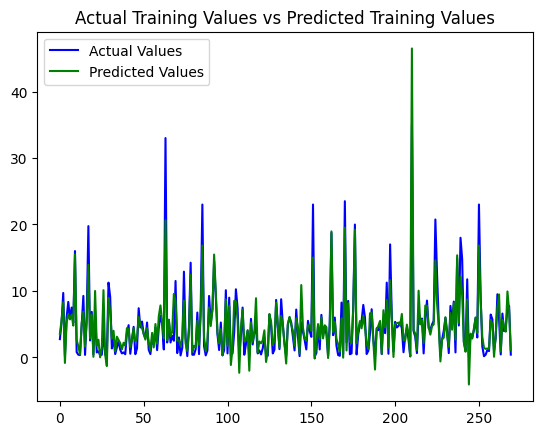

In [21]:
plt.plot(Y_train, color='Blue',label = 'Actual Values')
plt.plot(training_data_prediction, color='Green',label = 'Predicted Values')
plt.title('Actual Training Values vs Predicted Training Values')
plt.legend()
plt.show()

In [22]:
testing_data_prediction = regressor.predict(X_test)

In [23]:
Error = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error score : ",Error)

R squared error score :  0.8709167941173195


In [24]:
Y_test = list(Y_test)

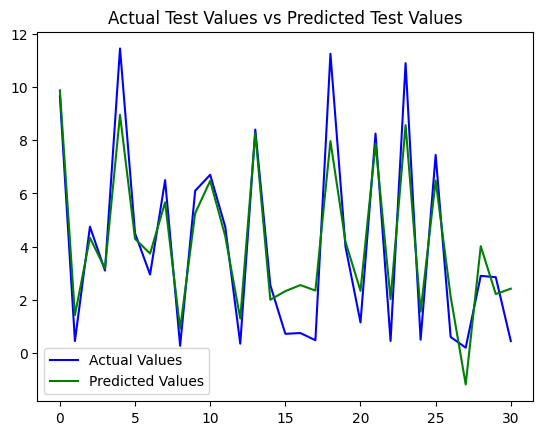

In [25]:
plt.plot(Y_test, color='Blue',label = 'Actual Values')
plt.plot(testing_data_prediction, color='Green',label = 'Predicted Values')
plt.title('Actual Test Values vs Predicted Test Values')
plt.legend()
plt.show()

In [26]:
regressor.fit(X,Y)

Lasso()

The Prediction System

In [27]:
input_data = (2013,9.54,43000,1,0,0,0)

#changing the data into numpy arrays
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("Predicted price of the car is : ",str(prediction))

Predicted price of the car is :  [5.40290049]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [28]:
#saving the model
import pickle
filename = "Trained_model.sav"
pickle.dump(regressor,open(filename,'wb'))